In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/old-car-price-prediction/car_price.csv


In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df=pd.read_csv('/kaggle/input/old-car-price-prediction/car_price.csv')


# Data cleansing:

**Duplicated values:**

In [4]:
df[df.duplicated()].count()

Unnamed: 0             0
car_name               0
car_prices_in_rupee    0
kms_driven             0
fuel_type              0
transmission           0
ownership              0
manufacture            0
engine                 0
Seats                  0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           5512 non-null   int64 
 1   car_name             5512 non-null   object
 2   car_prices_in_rupee  5512 non-null   object
 3   kms_driven           5512 non-null   object
 4   fuel_type            5512 non-null   object
 5   transmission         5512 non-null   object
 6   ownership            5512 non-null   object
 7   manufacture          5512 non-null   int64 
 8   engine               5512 non-null   object
 9   Seats                5512 non-null   object
dtypes: int64(2), object(8)
memory usage: 430.8+ KB


**NA values:**

In [6]:
df[df.isna()].count()

Unnamed: 0             0
car_name               0
car_prices_in_rupee    0
kms_driven             0
fuel_type              0
transmission           0
ownership              0
manufacture            0
engine                 0
Seats                  0
dtype: int64

In [7]:
df=df.drop(columns='Unnamed: 0',axis=1)

In [8]:
df.loc[df['car_prices_in_rupee'].str.contains('Lakh'), 'Currency'] = 'Lakh'
df.loc[df['car_prices_in_rupee'].str.contains('Crore'), 'Currency'] = 'Crore'

In [9]:
df=df.dropna()


In [10]:
df.head()

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,Currency
0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats,Lakh
1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats,Lakh
2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats,Lakh
3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats,Lakh
4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats,Lakh


**Dealing with Currencies and other objects:**

In [11]:
df['kms_driven']=df['kms_driven'].str.replace(' kms','')
df['car_prices_in_rupee']=df['car_prices_in_rupee'].str.replace(' Lakh','')
df['kms_driven']=df['kms_driven'].str.replace(',','')
df['Seats']=df['Seats'].str.replace(' Seats','')
df['engine']=df['engine'].str.replace(' cc','')
df['car_prices_in_rupee']=df['car_prices_in_rupee'].str.replace(' Crore','')


In [12]:
df['car_prices_in_rupee']=df['car_prices_in_rupee'].astype('float')
df['kms_driven']=df['kms_driven'].astype('int')
df['Seats']=df['Seats'].astype('int')
df['engine']=df['engine'].astype('int')

**Currency exchange:**

In [13]:

df['car_prices_in_rupee']=np.where(df['Currency'] == 'Crore',
                                           df['car_prices_in_rupee'] * 100,
                                           df['car_prices_in_rupee'])

In [14]:
df['car_prices_in_rupee']=df['car_prices_in_rupee']*100000

In [15]:
df2=pd.read_csv('/kaggle/input/old-car-price-prediction/car_price.csv')
df2=df2[df2["car_prices_in_rupee"].str.contains("Lakh")==False]
df2=df2[df2["car_prices_in_rupee"].str.contains("Crore")==False]
df2['kms_driven']=df2['kms_driven'].str.replace(' kms','')
df2['kms_driven']=df2['kms_driven'].str.replace(',','')
df2['Seats']=df2['Seats'].str.replace(' Seats','')
df2['engine']=df2['engine'].str.replace(' cc','')
df2['car_prices_in_rupee']=df2['car_prices_in_rupee'].str.replace(',','')
df2['car_prices_in_rupee']=df2['car_prices_in_rupee'].astype('int')
df2['kms_driven']=df2['kms_driven'].astype('int')
df2['Seats']=df2['Seats'].astype('int')
df2['engine']=df2['engine'].astype('int')

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123 entries, 238 to 5439
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           123 non-null    int64 
 1   car_name             123 non-null    object
 2   car_prices_in_rupee  123 non-null    int64 
 3   kms_driven           123 non-null    int64 
 4   fuel_type            123 non-null    object
 5   transmission         123 non-null    object
 6   ownership            123 non-null    object
 7   manufacture          123 non-null    int64 
 8   engine               123 non-null    int64 
 9   Seats                123 non-null    int64 
dtypes: int64(6), object(4)
memory usage: 10.6+ KB


In [17]:
df3=[df,df2]
df=pd.concat(df3)

In [18]:
df=df.drop(columns='Unnamed: 0',axis=1)
df=df.drop(columns='Currency',axis=1)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5512 entries, 0 to 5439
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_name             5512 non-null   object 
 1   car_prices_in_rupee  5512 non-null   float64
 2   kms_driven           5512 non-null   int64  
 3   fuel_type            5512 non-null   object 
 4   transmission         5512 non-null   object 
 5   ownership            5512 non-null   object 
 6   manufacture          5512 non-null   int64  
 7   engine               5512 non-null   int64  
 8   Seats                5512 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 430.6+ KB


**Now we have a clean dataset:**

# Data analysis:

In [20]:
df.head()

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,Jeep Compass 2.0 Longitude Option BSIV,1003000.0,86226,Diesel,Manual,1st Owner,2017,1956,5
1,Renault Duster RXZ Turbo CVT,1283000.0,13248,Petrol,Automatic,1st Owner,2021,1330,5
2,Toyota Camry 2.5 G,1640000.0,60343,Petrol,Automatic,1st Owner,2016,2494,5
3,Honda Jazz VX CVT,777000.0,26696,Petrol,Automatic,1st Owner,2018,1199,5
4,Volkswagen Polo 1.2 MPI Highline,515000.0,69414,Petrol,Manual,1st Owner,2016,1199,5


In [21]:
plt.style.use('Solarize_Light2')

<AxesSubplot:title={'center':'Average car price by Year'}, xlabel='manufacture'>

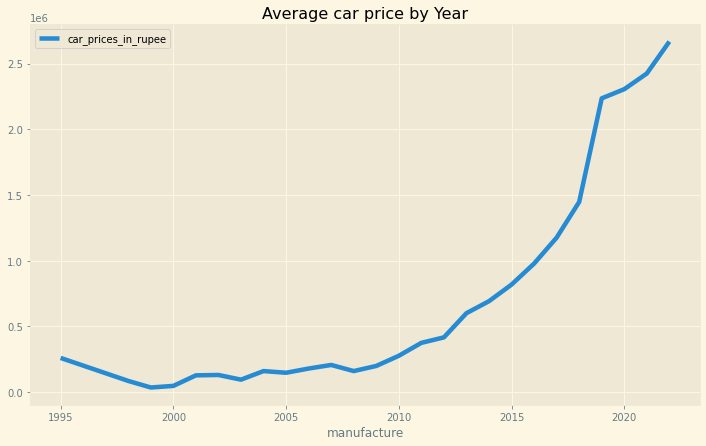

In [22]:
pv1=pd.pivot_table(df, index=['manufacture'],values = ['car_prices_in_rupee'],aggfunc = 'mean') 
pv1.plot(kind='line',linewidth=4.5,figsize=(12,7),title='Average car price by Year')

**The average car price has been moving up over years**

<AxesSubplot:title={'center':'Average car price by Number of seats'}, xlabel='Seats'>

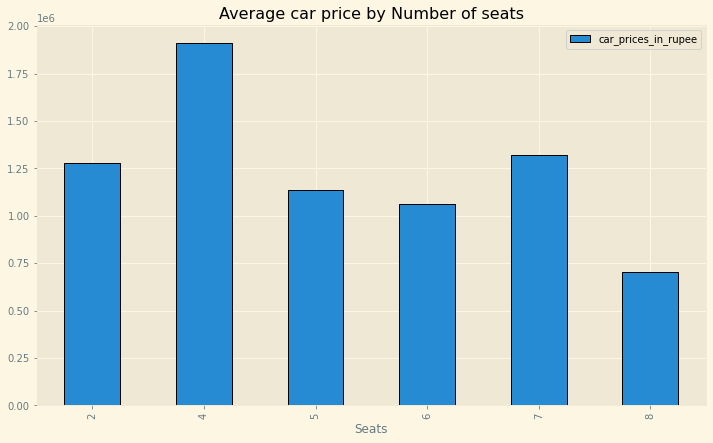

In [23]:
pv2=pd.pivot_table(df, index=['Seats'],values = ['car_prices_in_rupee'],aggfunc = 'mean') 
pv2.plot(kind='bar',figsize=(12,7),title='Average car price by Number of seats',edgecolor = 'black')

**Cars with 4 seats has the highest average price in the market**

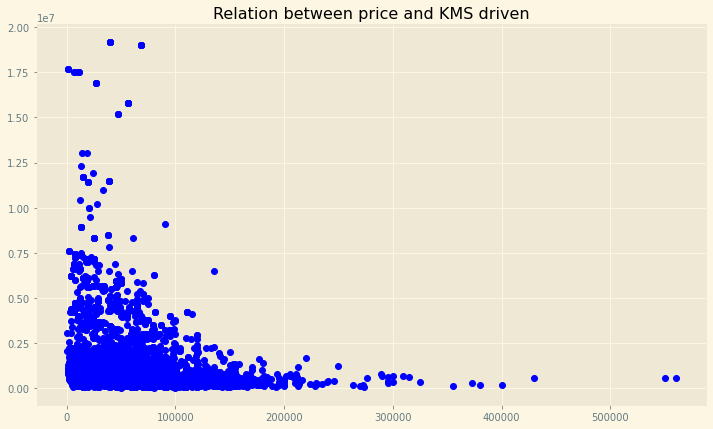

In [24]:
plt.style.use('Solarize_Light2')
plt.figure(figsize=(12,7))
plt.title('Relation between price and KMS driven')
plt.scatter(df.kms_driven,df.car_prices_in_rupee,color="b")


**Of course, more KMS means a lower price**

In [25]:
plt.style.use('Solarize_Light2')

<AxesSubplot:title={'center':'Price Distribution'}, ylabel='Frequency'>

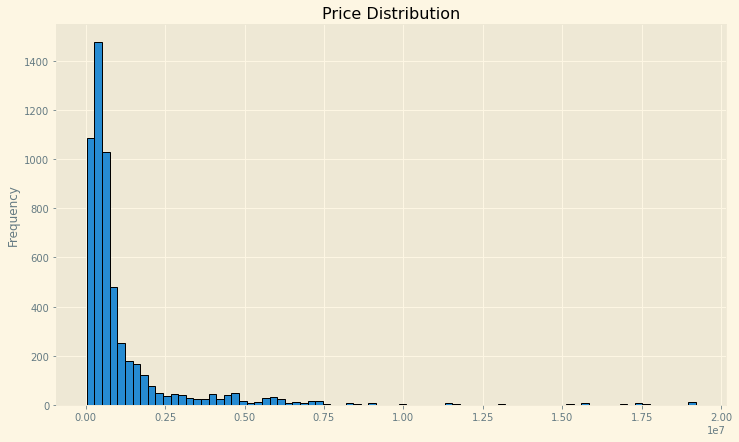

In [26]:
plt.style.use('Solarize_Light2')
price=df['car_prices_in_rupee']
price.plot(kind='hist',figsize=(12,7),bins=80,edgecolor = 'black',title='Price Distribution')



**Most of the cars price range between 0 and 5000000 rupee**

<AxesSubplot:title={'center':'The Most expensive 5 cars'}, ylabel='car_name'>

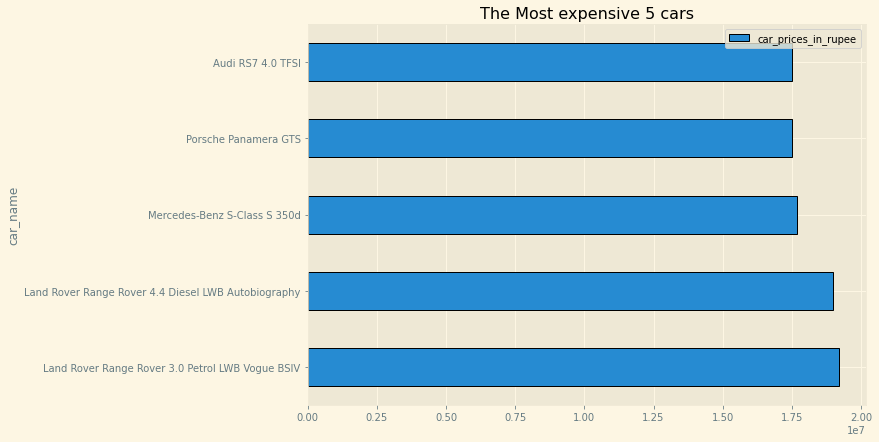

In [27]:
top5=pd.pivot_table(df,index='car_name',values='car_prices_in_rupee').sort_values(by='car_prices_in_rupee',ascending=False)
top5=top5.head(5)
top5.plot(kind='barh',figsize=(10,7),edgecolor = 'black',title='The Most expensive 5 cars')

**Most 5 expensive cars in the market**

<AxesSubplot:title={'center':'Price level by number of owners'}, xlabel='ownership'>

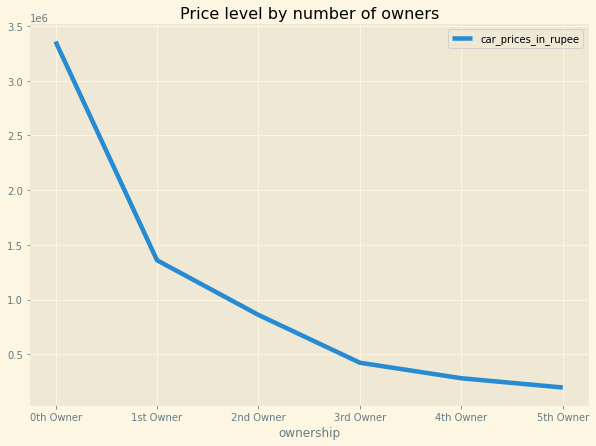

In [28]:
own=pd.pivot_table(df,index='ownership',values='car_prices_in_rupee')
own.plot(kind='line',figsize=(10,7),linewidth=4.5,title='Price level by number of owners')

**More owners mean a lower price **

<AxesSubplot:title={'center':'Engines developement over years'}, xlabel='manufacture'>

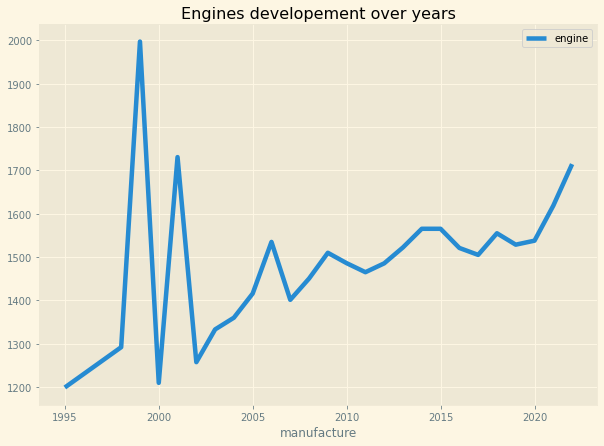

In [29]:
eng=pd.pivot_table(df,index='manufacture',values='engine',aggfunc='mean')
eng.plot(kind='line',figsize=(10,7),linewidth=4.5,title='Engines developement over years')

**In general, the average engine rate is increasing over years**

<AxesSubplot:title={'center':'Average price by Fuel type'}, ylabel='transmission'>

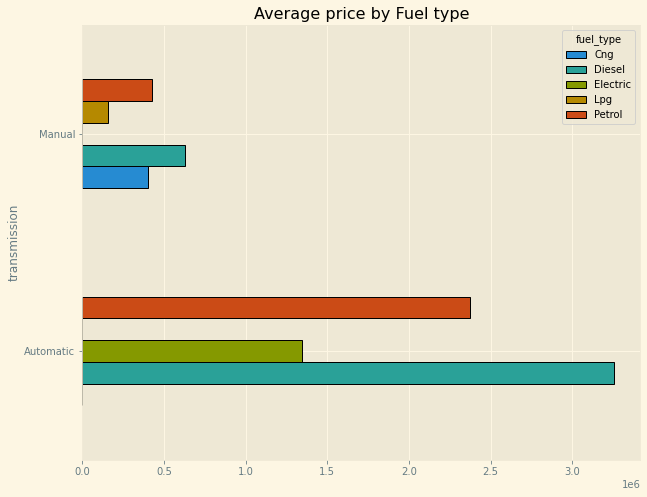

In [30]:
transm=pd.pivot_table(df,index='transmission',values='car_prices_in_rupee',columns='fuel_type')
transm.plot(kind='barh',figsize=(10,8),edgecolor = 'black',title='Average price by Fuel type')

**Automatic Diesel cars has the highest average price is the market, while Manuel Lpg got the lowest average car price**

<AxesSubplot:title={'center':'Number of cars by Fuel type'}, ylabel='fuel_type'>

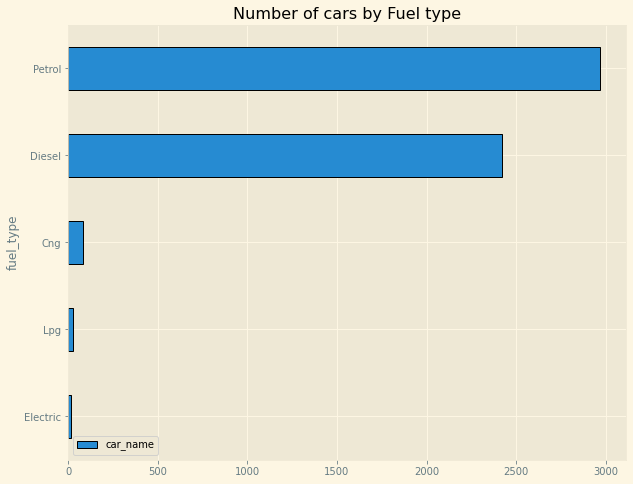

In [31]:
fuelc=pd.pivot_table(df,index='fuel_type',values='car_name',aggfunc='count').sort_values(by='car_name')
fuelc.plot(kind='barh', edgecolor = 'black',figsize=(10,8),title='Number of cars by Fuel type')

**Petrol fuel cars are the most common fuel type in the market**

array([<AxesSubplot:ylabel='car_name'>], dtype=object)

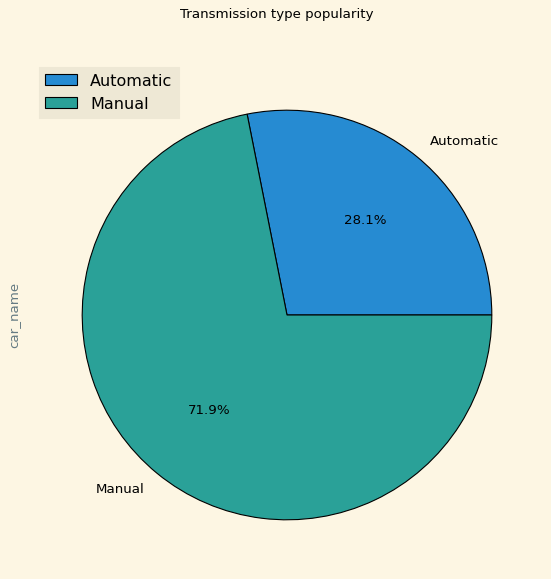

In [55]:
plt.style.use('Solarize_Light2')
transmc=pd.pivot_table(df,index='transmission',values='car_name',aggfunc='count')
transmc.plot(kind='pie',figsize=(10,8),subplots=True,autopct='%1.1f%%',title='Transmission type popularity')

**Manuel transission cars are more common**

In [33]:
train=df.copy()

In [34]:
train['car_name']=pd.factorize(train.car_name)[0]
train['fuel_type']=pd.factorize(train.fuel_type)[0]
train['transmission']=pd.factorize(train.transmission)[0]
train['ownership']=pd.factorize(train.ownership)[0]

In [35]:
train.corr()

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
car_name,1.000000,-0.027745,0.067647,-0.050781,-0.050430,0.062322,-0.057493,-0.034619,0.007923
car_prices_in_rupee,-0.027745,1.000000,-0.242475,-0.163830,0.532867,-0.143552,0.351760,0.164781,0.006138
kms_driven,0.067647,-0.242475,1.000000,-0.223668,-0.211246,0.263524,-0.479255,-0.028102,0.018419
fuel_type,-0.050781,-0.163830,-0.223668,1.000000,-0.124577,-0.034246,-0.039386,-0.085552,-0.043097
transmission,-0.050430,0.532867,-0.211246,-0.124577,1.000000,-0.069290,0.257152,0.176008,-0.008757
ownership,0.062322,-0.143552,0.263524,-0.034246,-0.069290,1.000000,-0.400983,-0.015454,-0.006464
manufacture,-0.057493,0.351760,-0.479255,-0.039386,0.257152,-0.400983,1.000000,0.064671,0.008496
engine,-0.034619,0.164781,-0.028102,-0.085552,0.176008,-0.015454,0.064671,1.000000,0.135736
Seats,0.007923,0.006138,0.018419,-0.043097,-0.008757,-0.006464,0.008496,0.135736,1.000000


<AxesSubplot:>

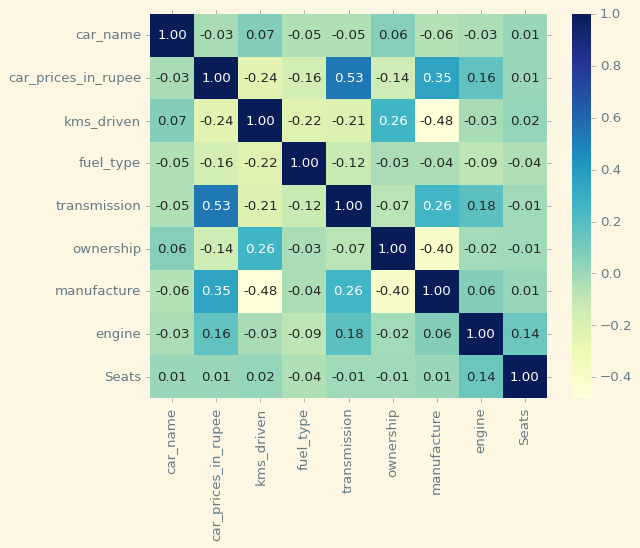

In [56]:
plt.style.use('Solarize_Light2')
sns.heatmap(train.corr(),annot = True, cmap= 'YlGnBu', fmt= '.2f')

**As we can see, transmission type, manufacture year, engine rate, fuel type and Kms driven has a strong impact on the car price.**

# Machine learning part:

In [37]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score

In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5512 entries, 0 to 5439
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_name             5512 non-null   int64  
 1   car_prices_in_rupee  5512 non-null   float64
 2   kms_driven           5512 non-null   int64  
 3   fuel_type            5512 non-null   int64  
 4   transmission         5512 non-null   int64  
 5   ownership            5512 non-null   int64  
 6   manufacture          5512 non-null   int64  
 7   engine               5512 non-null   int64  
 8   Seats                5512 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 430.6 KB


**Setting Features and terget**

In [39]:
X= train.drop(columns='car_prices_in_rupee',axis=1)
Y= train['car_prices_in_rupee']

**Splitting the dataset**

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.15, random_state = 100)

**Model training:**

In [43]:
xgbr = xgb.XGBRegressor(verbosity=0)
xgbr.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

**Model accuracy:**

In [47]:
score1 = xgbr.score(X_train,y_train)
score1

0.9847485481456919

In [44]:
y_pred1 = xgbr.predict(X_test)
rscore1=r2_score(y_test, y_pred1)
rscore1

0.7401568264264318

**We have %74 as score for our test data, it's not that good, Can you suggest some techniques to increase that accuracy?**

In [45]:
df['Price_prediction']=xgbr.predict(X)

In [48]:
df.head(15)

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,Price_prediction
0,Jeep Compass 2.0 Longitude Option BSIV,1003000.0,86226,Diesel,Manual,1st Owner,2017,1956,5,1.042074e+06
1,Renault Duster RXZ Turbo CVT,1283000.0,13248,Petrol,Automatic,1st Owner,2021,1330,5,1.340268e+06
2,Toyota Camry 2.5 G,1640000.0,60343,Petrol,Automatic,1st Owner,2016,2494,5,1.546948e+06
3,Honda Jazz VX CVT,777000.0,26696,Petrol,Automatic,1st Owner,2018,1199,5,6.025489e+05
4,Volkswagen Polo 1.2 MPI Highline,515000.0,69414,Petrol,Manual,1st Owner,2016,1199,5,5.618612e+05
5,Volkswagen Vento 1.2 TSI Highline AT,766000.0,49719,Petrol,Automatic,1st Owner,2017,1197,5,7.254131e+05
6,Volkswagen Vento 1.2 TSI Highline Plus AT,758000.0,43688,Petrol,Automatic,1st Owner,2017,1197,5,1.011909e+06
7,Honda WR-V VX Diesel,1160000.0,14470,Diesel,Manual,1st Owner,2021,1498,5,1.340250e+06
8,Honda City i VTEC CVT SV,699000.0,21429,Petrol,Automatic,1st Owner,2015,1497,5,5.342415e+05
9,Renault Duster Petrol RXS CVT,753000.0,31750,Petrol,Automatic,1st Owner,2017,1498,5,7.036143e+05


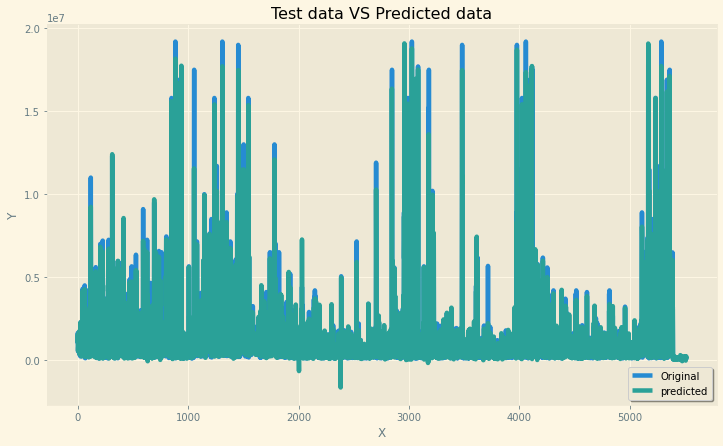

In [49]:
prd=df['Price_prediction']
x_ax = range(len(Y))
plt.figure(figsize=(12,7))
plt.plot(x_ax, Y,linewidth = '4.5', label="Original")
plt.plot(x_ax, prd, linewidth = '4.5', label="predicted")
plt.title("Test data VS Predicted data")
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc='lower right',fancybox=True, shadow=True)
plt.show() 

Text(0.5, 1.0, 'Prediction and Original data correlation')

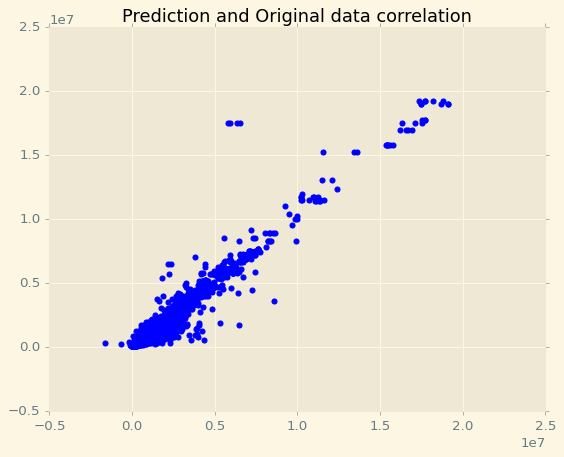

In [57]:

plt.scatter(df['Price_prediction'],df['car_prices_in_rupee'],color="b")
plt.title('Prediction and Original data correlation')

**We can see that Prediction and Origianl data has a high correlation around  the 0-1000000 rupee range, this model can be updated in the future after trying some hypertuning parameter to increase the accuracy.
If you like this notebook, don't forget to upvote it! Thank you!**